In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем треки с известной датой записи

In [161]:
metadata = pd.read_csv('fma_metadata/raw_tracks.csv')[['track_id', 'track_date_recorded']]
metadata.dropna(inplace=True)

metadata['track_date'] = pd.to_datetime(metadata['track_date_recorded'])
metadata

,track_id,track_date_recorded,track_date
0,2,11/26/2008,2008-11-26
1,3,11/26/2008,2008-11-26
2,5,11/26/2008,2008-11-26
3,10,11/26/2008,2008-11-26
4,20,1/01/2008,2008-01-01
...,...,...,...
108967,154439,12/12/2009,2009-12-12
108968,154440,12/12/2009,2009-12-12
108969,154441,12/12/2009,2009-12-12
108970,154442,12/12/2009,2009-12-12


Их всего 6444 штуки. Сгруппируем даты по годам и десятилетиям

In [162]:
metadata['year'] = metadata['track_date'].dt.year
metadata['decade'] = metadata['year']//10*10
metadata

,track_id,track_date_recorded,track_date,year,decade
0,2,11/26/2008,2008-11-26,2008,2000
1,3,11/26/2008,2008-11-26,2008,2000
2,5,11/26/2008,2008-11-26,2008,2000
3,10,11/26/2008,2008-11-26,2008,2000
4,20,1/01/2008,2008-01-01,2008,2000
...,...,...,...,...,...
108967,154439,12/12/2009,2009-12-12,2009,2000
108968,154440,12/12/2009,2009-12-12,2009,2000
108969,154441,12/12/2009,2009-12-12,2009,2000
108970,154442,12/12/2009,2009-12-12,2009,2000


In [163]:
grouped_by_decade = metadata.groupby('decade').count()
grouped_by_year = metadata.groupby('year').count()

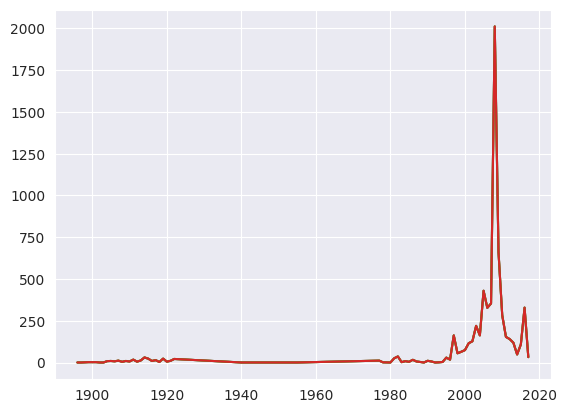

In [164]:
plt.plot(grouped_by_year)
plt.show()

In [165]:
grouped_by_year['track_id'].nlargest(10)

year
2008    2011
2009     663
2005     430
2007     354
2016     329
2006     328
2010     284
2003     220
1997     163
2004     163
Name: track_id, dtype: int64

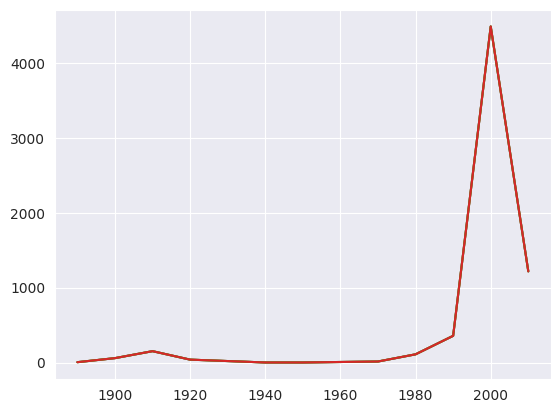

In [166]:
plt.plot(grouped_by_decade)
plt.show()

In [167]:
grouped_by_decade['track_id'].nlargest(10)

decade
2000    4488
2010    1218
1990     357
1910     152
1980     110
1900      59
1920      39
1970      14
1890       5
1940       1
Name: track_id, dtype: int64

Видим, что распределение классов очень несбалансированно. Было принято решение классифицировать песни по декадам, и объединить декады старше 1990 года в один кластер. Оставим по 356 композиций каждой декады. Конечно, этого количества недостаточно, однако в рамках проекта было принято решение работать с одним датасетом.

In [168]:
metadata['prep_decade'] = metadata['decade'].apply(lambda x: 'old' if x < 1990 else str(x))

In [169]:
metadata[metadata['prep_decade'] == 'old'].shape[0]

381

In [170]:
resulting_df = metadata[['track_id', 'prep_decade']].groupby('prep_decade').apply(lambda x: x.sample(356, random_state = 111)).reset_index(drop=True)
resulting_df

,track_id,prep_decade
0,1111,1990
1,7170,1990
2,4857,1990
3,120852,1990
4,4890,1990
...,...,...
1419,19622,old
1420,5016,old
1421,324,old
1422,34333,old


In [171]:
resulting_df.to_csv('decade_classification_metadata.csv', index=False)

In [174]:
metadata2 = pd.read_csv('./decade_classification_metadata.csv')

# Создаем словарь маппер id песни - декада выпуска
id_to_genre = {str(k): v for k, v in metadata2.set_index('track_id').to_dict()['prep_decade'].items()}

In [173]:
id_to_genre

{'1111': '1990',
 '7170': '1990',
 '4857': '1990',
 '120852': '1990',
 '4890': '1990',
 '1375': '1990',
 '120867': '1990',
 '6885': '1990',
 '4906': '1990',
 '1802': '1990',
 '1785': '1990',
 '4898': '1990',
 '120874': '1990',
 '18063': '1990',
 '4967': '1990',
 '34329': '1990',
 '4119': '1990',
 '1365': '1990',
 '4908': '1990',
 '1131': '1990',
 '1129': '1990',
 '1148': '1990',
 '4117': '1990',
 '4937': '1990',
 '1361': '1990',
 '1834': '1990',
 '1119': '1990',
 '4968': '1990',
 '6886': '1990',
 '1357': '1990',
 '3154': '1990',
 '4860': '1990',
 '638': '1990',
 '1336': '1990',
 '51411': '1990',
 '144': '1990',
 '4983': '1990',
 '4924': '1990',
 '18559': '1990',
 '4972': '1990',
 '6883': '1990',
 '12416': '1990',
 '991': '1990',
 '4855': '1990',
 '4980': '1990',
 '19290': '1990',
 '4938': '1990',
 '4925': '1990',
 '4923': '1990',
 '11305': '1990',
 '120881': '1990',
 '34330': '1990',
 '1377': '1990',
 '4970': '1990',
 '1358': '1990',
 '120868': '1990',
 '993': '1990',
 '4922': '1990',
